In [10]:
%matplotlib inline

#### _Distributions_
* Most common representation: Histograms, that shows the frequency of each value;
* O que pode ser iteressante notar quando estamos olhando para uma distribuição em um histograma?
 * Tendência central: Os dados convergem para um ponto específico? Boa medida: Mean.
   * Não entendi a distinção que o autor coloca entre average e mean. Só posso falar de average se minha variância é pequena?
 * Moda: Existe mais de uma?
 * Spread: Os dados variam/dispersam muito?
 * Tails: O quão rápido as probabilidades caem conforme vamos andando mais para longe do centro?
 * Outliers:
 * O que mais eu procuro enxergar quando estou olhando para um histograma? 
    

#### _Probability mass functions_

* Which is also called PMF
* Pensando que queremos comparar duas distribuções através de um hstograma. Isso poderá gerar connfusão pois o que pensamos ser uma diferença válida para um determinado intervalo, significa apenas que as amostras tem tamanhos diferentes, mas não uma distribuição diferente. Sendo assim, o PMF ...

####  _Cumulative distribution functions_

* Which is also called CDF

####  _Probability density functions_

PDF (ou FDP) é a derivada de uma CDF (FDA)

* O que é a derivada?
* O que é densidade?


1. Exponential Distribution
    * CDF(x) = 1 - e^(-λx)
    * The complement of CDF(x), the CCDF(x) is 1 - CDF(x). Why we use it?
    * PDF(x) = expon.pdf(x) = exp(-x) < Isso no SciPy
    * Where is common to see?
    * How to calculate the median and the mean of a exponential distribution?
    * Why every distribution has the same appeareance (exponential distribution)? Exercise: Plot a exponential, and areto with the same parameters and see how much it is different.

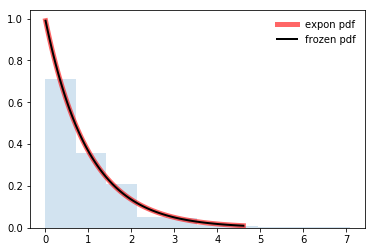

In [45]:
# Exponential Distribution

from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Qual o papel de skew aqui? e do kurt?
# O que é 'mvsk'? 'm' = mean,'v' = variance,'s' = (Fisher's) skew,'k' = (Fisher's) kurtosis.
mean, var, skew, kurt = expon.stats(moments='mvsk')

x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
#print(x)
ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')

# Can't print frozen :(
# What is the mean objective of a frozen pdf?
# Where am I are defining the y value?

rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))
r = expon.rvs(size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

# To do: found a exponential real dataset

2. Pareto
    * Mean usage/where it appears? 
    * CDF(x)?
    * PDF(x)?
    * How to calculate the mean and median?

**Exercise 4:** To get a feel for the Pareto distribution, imagine what the world would be like if the distribution of human height were Pareto. Choosing the parameters xm = 100 cm and α = 1.7, we get a distribution with a reasonable minimum, 100 cm, and median, 150 cm. Generate 6 billion random values from this distribution. What is the mean of this sample? What fraction of the population is shorter than the mean? How tall is the tallest person in Pareto World?

## Types of parameters
* Shape parameter
* Scale paramter
* Bla (?) parameter

## References 
* http://greenteapress.com/thinkstats2/thinkstats2.pdf
* https://en.wikipedia.org/wiki/List_of_probability_distributions

## Probability Distributions 

### Continuous distributions

**1. Supported on the whole real line**

1.1 The normal distribution (also called Gaussian or the bell curve) 
* Do not have a *shape parameter*, in other words, their shape is fixed and only their location or their scale or both can change.
* Distribuição simétrica

In [3]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import numpy as np

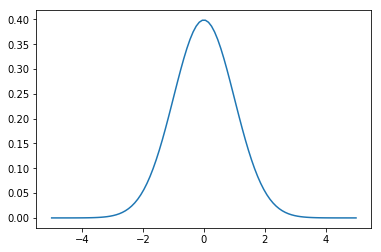

In [60]:
mu = 0 # (parâmetro de posição)
variance = 1 # (parâmetro de escalonamento)
sigma = math.sqrt(variance)
x = np.linspace(mu-5*variance,mu+5*variance, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()

1.2 T-Student distribution

1.3 Laplace distribution

**2. Supported on a bounded interval** 

2.1 Beta distribution
* Parametrized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution;
* Defined on the interval [0, 1]; 
* **Usage:**  The beta distribution is a suitable model for the random behavior of percentages and proportions. That's because ____.

In [71]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [72]:
a, b = 2.30984964515, 0.62687954301

In [73]:
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

In [75]:
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

In [76]:
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')

In [77]:
rv = beta(a, b)

In [78]:
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [79]:
vals = beta.ppf([0.001, 0.5, 0.999], a, b)

In [80]:
np.allclose([0.001, 0.5, 0.999], beta.cdf(vals, a, b))

True

In [81]:
r = beta.rvs(a, b, size=1000)

In [82]:
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)

(array([ 0.09863314,  0.13151085,  0.19726628,  0.43836951,  0.4931657 ,
         1.00824988,  1.04112759,  1.34798625,  1.93978509,  4.2631435 ]),
 array([ 0.08752463,  0.17877186,  0.27001908,  0.3612663 ,  0.45251352,
         0.54376074,  0.63500796,  0.72625519,  0.81750241,  0.90874963,
         0.99999685]),
 <a list of 1 Patch objects>)

In [83]:
ax.legend(loc='best', frameon=False)

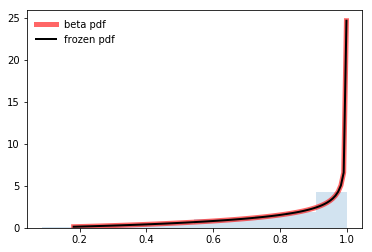

In [84]:
plt.show()

**3. Supported on semi-infinite intervals, usually [0,∞)**

3.1 The Weibull distribution 
* Parametrized by one shape parameter and a scale parameter
* **Usage:** Is used to model the lifetime of technical devices